2. А теперь настоящие быстрые сортировки

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

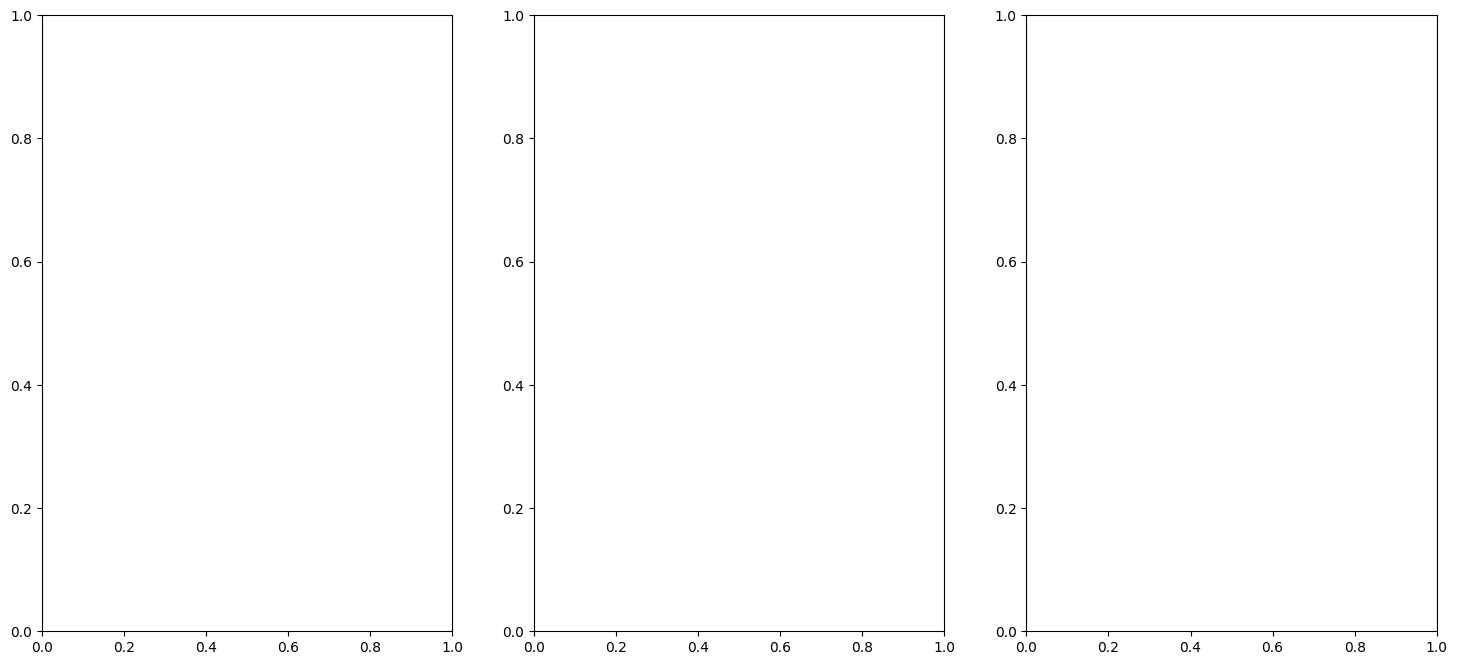

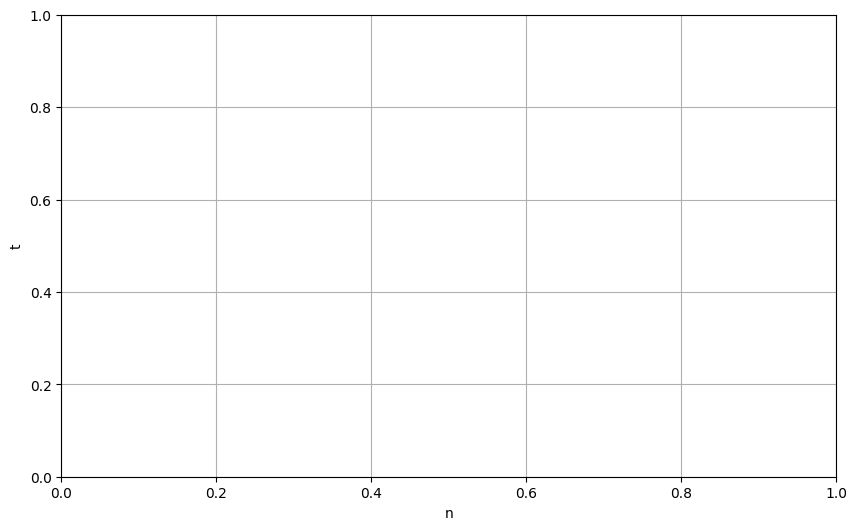

In [2]:
def linear_func(x, a, b):
    return a * x + b

def lsm(n, t): 
    params, covariance = curve_fit(linear_func, n, t)
    x = np.linspace(min(n), max(n), 1000)
    y = linear_func(x, params[0], params[1])
    return x, y, params[0], np.sqrt(np.diag(covariance))


fig, ax = plt.subplots(1, 3, figsize=(18, 8))
f, a = plt.subplots(1, 1, figsize=(10, 6))
a.set_xlabel('n')
a.set_ylabel('t')
a.grid()

Быстрая сортировка

In [3]:
data = np.array(pd.read_csv("quick_sort_csv.csv", header=None))

n = data[:, 0]
t = data[:, 1]

t_new = t / (n * np.log(n))
x, y = lsm(n, t_new)[0: 2]
print(lsm(n, t_new)[2:])
k = lsm(n, t_new)[2]

ax[0].plot(x, y, color='red')

ax[0].scatter(n, t_new, s=5)

ax[0].set_xlabel("n")
ax[0].set_ylabel("t/NlogN")
ax[0].set_title(f"quick, k={k}")

a.plot(n, t, label='quick')

ax[0].grid()

(np.float64(1.8567221838315403e-13), array([9.34641011e-16, 5.50851755e-11]))


Сортировка слиянием

In [4]:
data = np.array(pd.read_csv("merge_sort_csv.csv", header=None))

n = data[:, 0]
t = data[:, 1]

t_new = t / (n * np.log(n))
x, y = lsm(n, t_new)[0: 2]
print(lsm(n, t_new)[2:])
k = lsm(n, t_new)[2]


ax[1].plot(x, y, color='red')

ax[1].scatter(n, t_new, s=5)

ax[1].set_xlabel("n")
ax[1].set_ylabel("t/NlogN")
ax[1].set_title(f"merge, k={k}")

a.plot(n, t, label='merge')

ax[1].grid()

(np.float64(-1.174201856236298e-14), array([5.13132936e-16, 3.02426468e-11]))


Сортировка кучей

In [5]:
data = np.array(pd.read_csv("heap_sort_csv.csv", header=None))

n = data[:, 0]
t = data[:, 1]

t_new = t / (n * np.log(n))
x, y = lsm(n, t_new)[0: 2]
print(lsm(n, t_new)[2:])
k = lsm(n, t_new)[2]


ax[2].plot(x, y, color='red')

ax[2].scatter(n, t_new, s=5)

ax[2].set_xlabel("n")
ax[2].set_ylabel("t/NlogN")
ax[2].set_title(f"heap, k={k}")

a.plot(n, t, label='heap')

ax[2].grid()

(np.float64(7.263680096484656e-15), array([1.12267851e-15, 6.61675889e-11]))


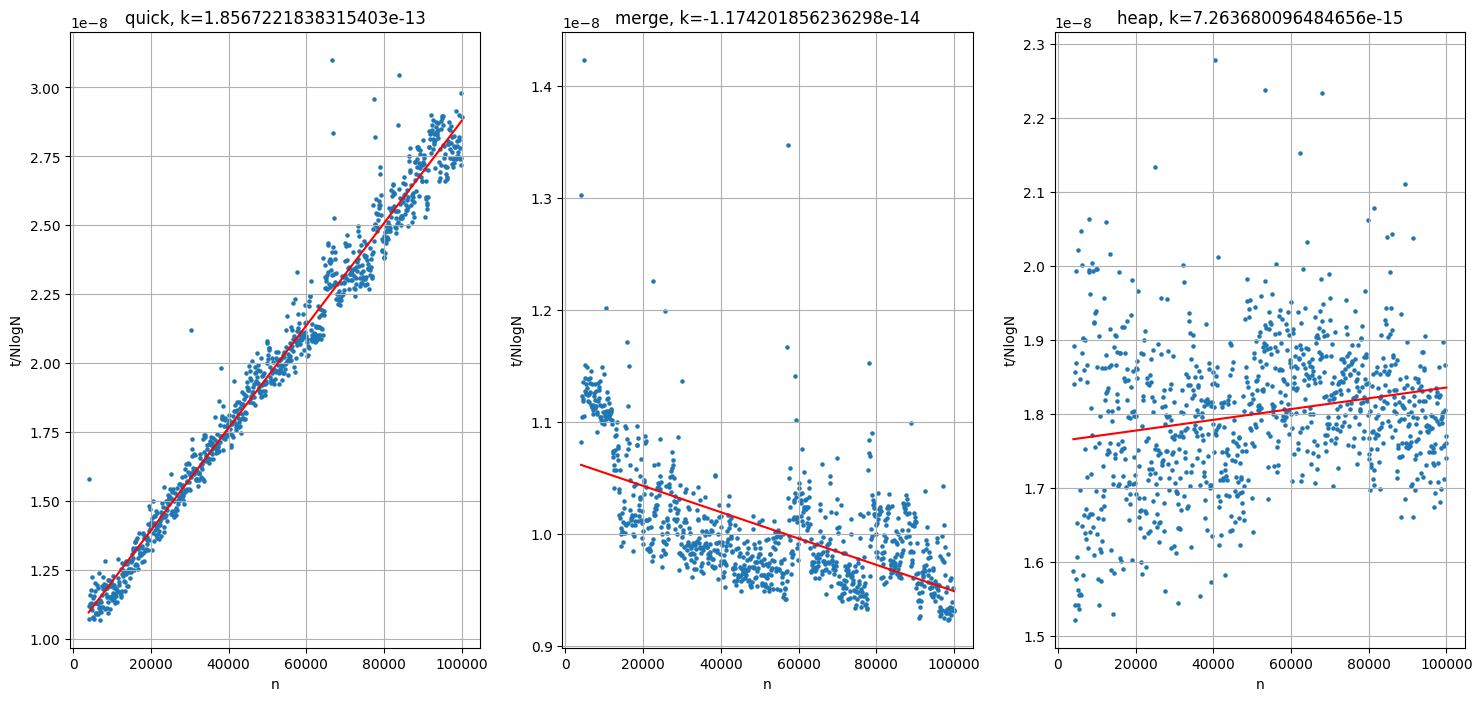

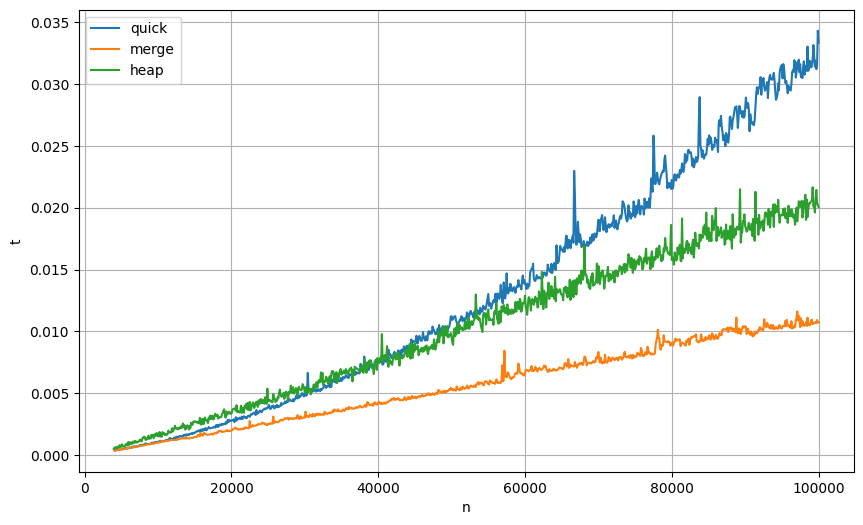

In [6]:
display(fig)
a.legend()
display(f)